In [1]:
# ------ import dependancies: api key, data link, and pandas ------
from config import apiKey
import nasdaqdatalink
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ------ Set up API Environment ------
# 1.) define api key
# 2.) configure the api key to work with the data link 
nasdaq_api = apiKey
nasdaqdatalink.ApiConfig.api_key = nasdaq_api

In [3]:
# ------ Create dataframe from entire data set -------
# 1.) create a database variable pointing to the data sourse (inflation rates)
# 2.) acess the metadata information for the data feilds (columns in the data source)
# 3.) Retrieve Datasets Available in the Database
# 4.) convert the 'ds' object to a list and create a dataframe from it
database = nasdaqdatalink.Database('RATEINF')
database.data_fields()
ds = database.datasets()
main_df = pd.DataFrame(ds.to_list())

In [4]:
# ------ create append 'regions' column to a new dat
# 1.) Create a list of table names by iterating through regions in the DataFrame
# 1.2.) and formatting them as "RATEINF/{region}"
# 2.) Sort the 'tables' list in ascending order
# 3.) display tables 
tables = [f"RATEINF/{region}" for region in main_df[1].to_list()]
tables.sort()
tables

['RATEINF/CPI_ARG',
 'RATEINF/CPI_AUS',
 'RATEINF/CPI_CAN',
 'RATEINF/CPI_CHE',
 'RATEINF/CPI_DEU',
 'RATEINF/CPI_EUR',
 'RATEINF/CPI_FRA',
 'RATEINF/CPI_GBR',
 'RATEINF/CPI_ITA',
 'RATEINF/CPI_JPN',
 'RATEINF/CPI_NZL',
 'RATEINF/CPI_RUS',
 'RATEINF/CPI_USA',
 'RATEINF/INFLATION_ARG',
 'RATEINF/INFLATION_AUS',
 'RATEINF/INFLATION_CAN',
 'RATEINF/INFLATION_CHE',
 'RATEINF/INFLATION_DEU',
 'RATEINF/INFLATION_EUR',
 'RATEINF/INFLATION_FRA',
 'RATEINF/INFLATION_GBR',
 'RATEINF/INFLATION_ITA',
 'RATEINF/INFLATION_JPN',
 'RATEINF/INFLATION_NZL',
 'RATEINF/INFLATION_RUS',
 'RATEINF/INFLATION_USA']

In [5]:
# create two empty lists:
# Consumer Price Index and inflation 
data_cpi = []
data_inflation = []

In [10]:
# for loop to loop through the data, appending the df to the list
for region in tables: 
    temp_df = nasdaqdatalink.get(region, paginate=True)
    temp_df.columns = [region.split('/')[-1]]
    temp_df = temp_df.loc['2001-01-01':]
    if 'CPI' in region:
        data_cpi.append(temp_df)
    else:
        data_inflation.append(temp_df)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

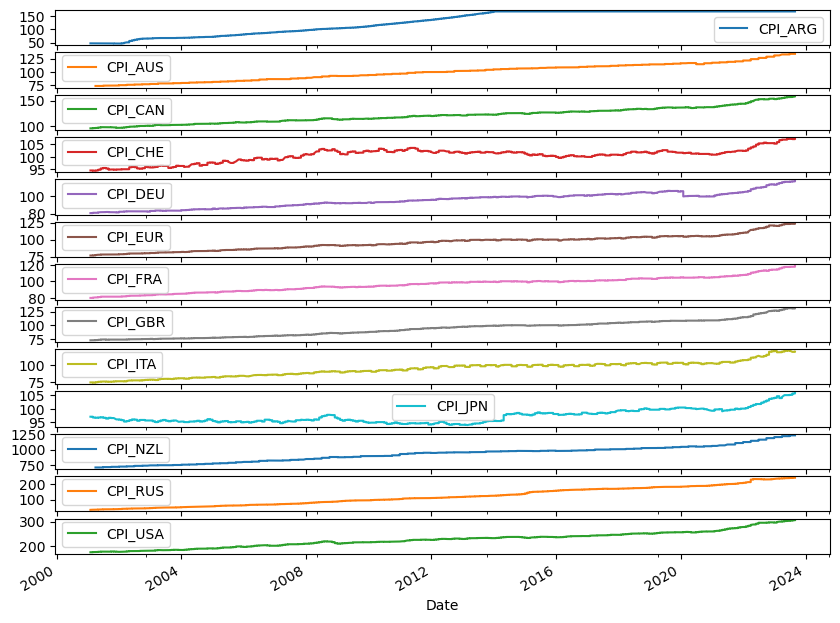

In [11]:
# Concatenate CPI data, sort the index, and forward-fill missing values for a clean time series.
# Then, create a plot with a specified figure size and subplots for better visualization.
pd.concat(data_cpi).sort_index().ffill().plot(figsize=(10, 8), subplots=True)


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

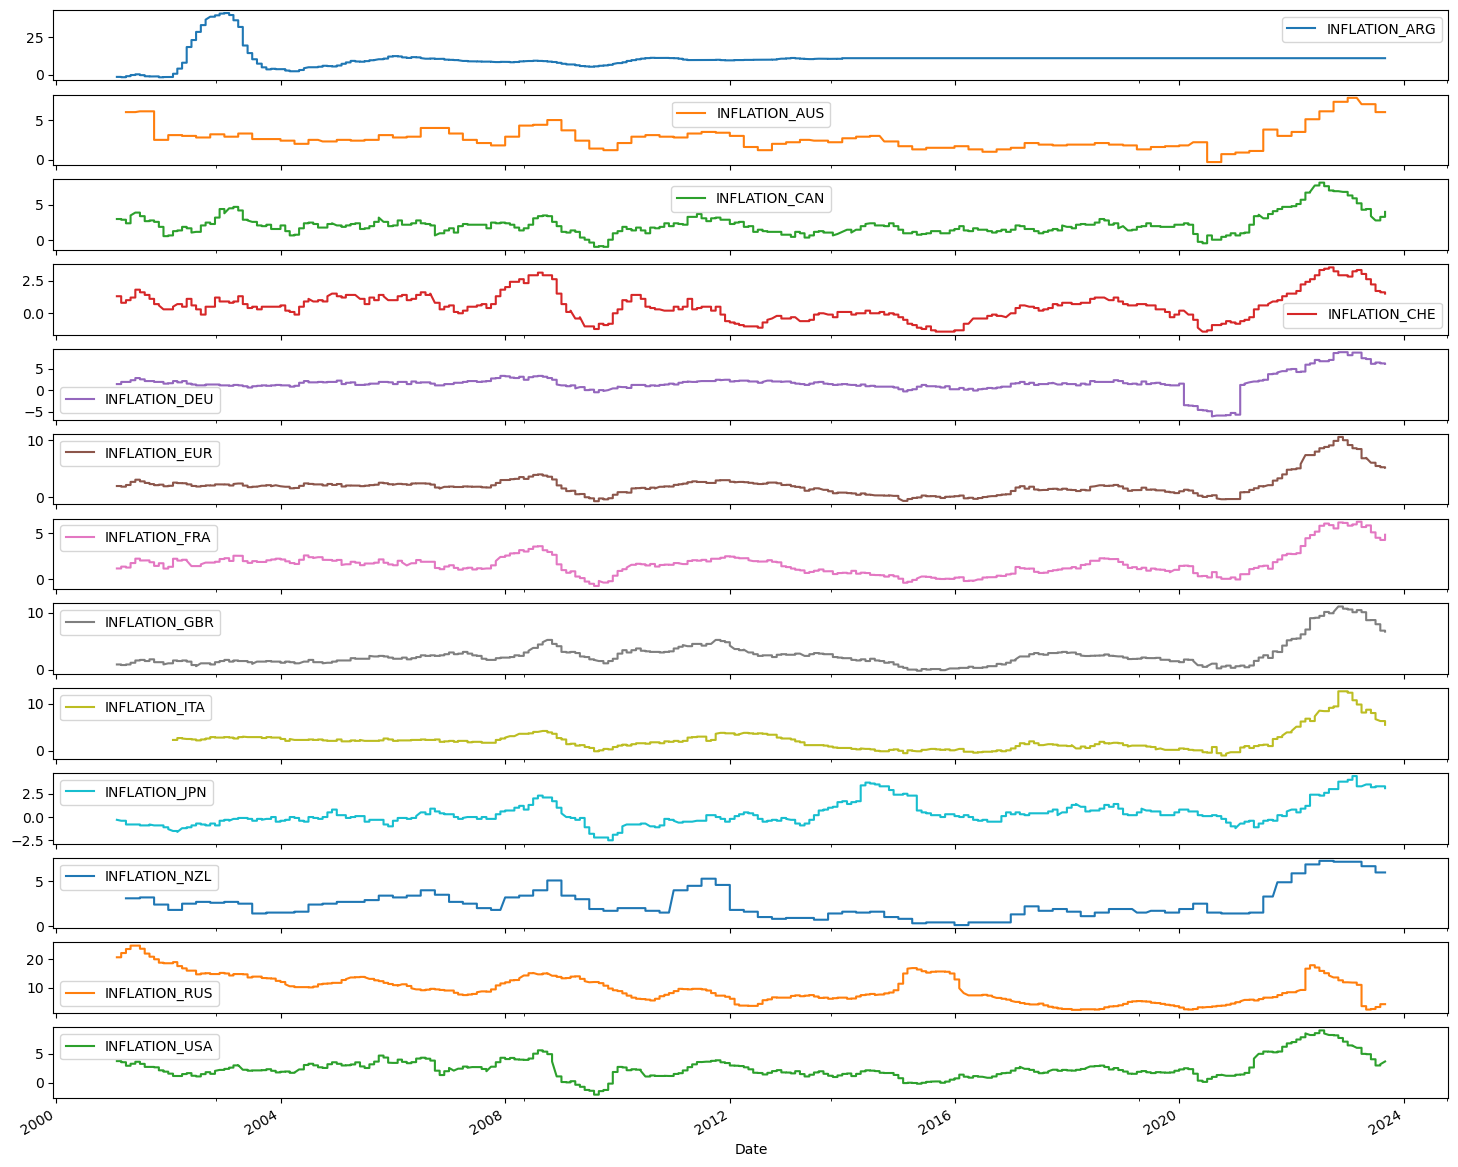

In [12]:
#--------- Create inflation rates graphs -------------
# 1.) Concatenate inflation rate data, ensuring proper time series alignment.
# 2.) Sort the index to maintain chronological order of data points.
# 3.) Forward-fill missing values to handle any gaps in the time series.
# 4.) Create a plot with a larger figure size (for better detail) and subplots (to separate data series).
pd.concat(data_inflation).sort_index().ffill().plot(figsize=(18, 16), subplots=True)